# **1 ячейка:**
Импорт необходимых библиотек

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# **2 ячейка:**
Загрузка данных из CSV-файлов

In [118]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# **3 ячейка:**
Вычисление корреляционной матрицы для test_df

In [119]:
test_df.corr()

<ipython-input-119-45847b2d573f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_df.corr()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


# **4 ячейка:**
Вычисление корреляционной матрицы для train_df

In [120]:
train_df.corr()

<ipython-input-120-a7a80d20a44e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# **5 ячейка:**
Визуализация корреляционной матрицы test_df с использованием тепловой карты:

<ipython-input-145-a52e29d7b815>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(test_df.corr())
<ipython-input-145-a52e29d7b815>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_df.corr(), annot=True, mask=matrix)


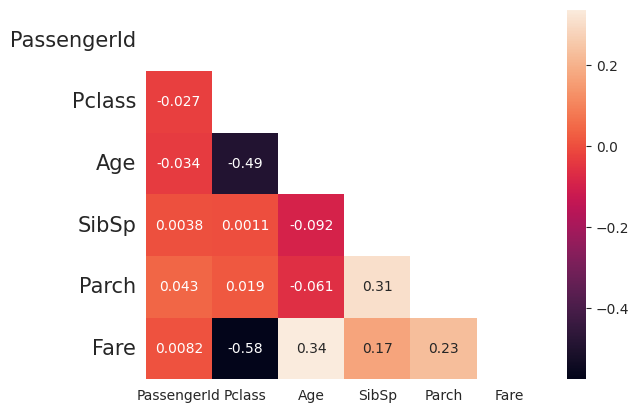

In [145]:
matrix = np.triu(test_df.corr())
sns.heatmap(test_df.corr(), annot=True, mask=matrix)
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.show()


# **6 ячейка:**
Визуализация корреляционной матрицы train_df с использованием тепловой карты:

<ipython-input-146-b1e79b499c2b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(train_df.corr())
<ipython-input-146-b1e79b499c2b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, mask=matrix)


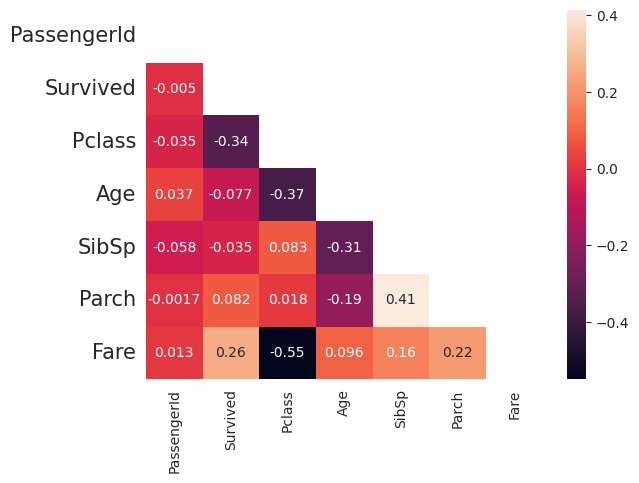

In [146]:
matrix = np.triu(train_df.corr())
sns.heatmap(train_df.corr(), annot=True, mask=matrix)
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.show()

# **7 ячейка:**
Вывод содержимого train_df

In [130]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **8 ячейка:**
Вывод содержимого test_df

In [131]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# **9 ячейка:**
Обработка данных в DataFrame df_y

In [132]:
df_y = train_df.drop('Name', axis=1)
df_y = df_y.drop('Ticket', axis=1)
df_y = df_y.drop('Cabin', axis=1)
df_y = df_y.drop('Survived', axis=1)
df_y = df_y.drop('PassengerId', axis=1)
from sklearn.linear_model import LogisticRegression
X =  df_y
y = train_df['Survived']
df_y

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [133]:
df_y.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

# **11 ячейка:**
Импорт и применение LabelEncoder для преобразования категориальных признаков

In [134]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_ = LabelEncoder()
le.fit(df_y.Sex)
list_Sex = le.transform(df_y.Sex)
df_y['Sex'] = list_Sex
le_.fit(df_y.Embarked)
list_Embarked = le_.transform(df_y.Embarked)

df_y['Embarked'] = list_Embarked

# **12 ячейка:**
Обработка столбца 'Age' в DataFrame df_y

In [135]:
list_age = []
import numpy as np
for i in df_y['Age']:
  if i != np.nan:
    if i > 0:
      list_age.append(int(i))
    else:
      list_age.append(0)
df_y['Age'] = list_age
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


# **13 ячейка:**
Обработка столбца 'Fare' в DataFrame df_y (аналогично предыдущему блоку для столбца 'Fare').

In [136]:
list_fare = []
import numpy as np
for i in df_y['Fare']:
  if i != np.nan:
    if i > 0:
      list_fare.append(int(i))
    else:
      list_fare.append(0)
df_y['Fare'] = list_fare
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Age       891 non-null    int64
 3   SibSp     891 non-null    int64
 4   Parch     891 non-null    int64
 5   Fare      891 non-null    int64
 6   Embarked  891 non-null    int64
dtypes: int64(7)
memory usage: 48.9 KB


# **14 ячейка:**
Создание объекта LogisticRegression:

-Обучение модели логистической регрессии

-Оценка точности модели логистической регрессии

In [138]:
log_reg = LogisticRegression()
log_reg.fit(X, y)
log_reg.score(X, y)

0.7901234567901234

# **15 ячейка:**
Создание объекта DecisionTreeClassifier:

-Обучение модели дерева решений

-Оценка точности модели дерева решений

In [141]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)
(clf.score(X, y))

0.7867564534231201

# **16 ячейка:**
Визуализация дерева решений

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.5, 'x[0] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 144\nvalue = [72, 72]'),
 Text(0.75, 0.5, 'x[0] <= 1.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.466\nsamples = 122\nvalue = [77, 45]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.242\nsamples = 455\nvalue = [391, 64]')]

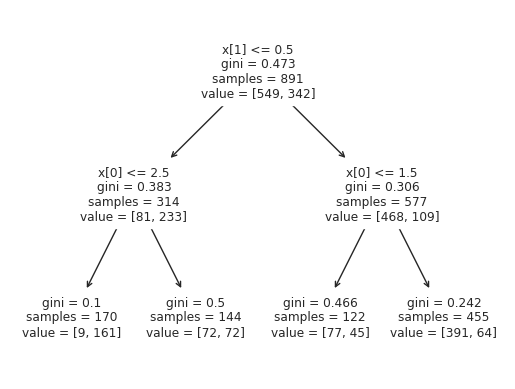

In [142]:
from sklearn.datasets import load_iris
from sklearn import tree
tree.plot_tree(clf)

# **17 ячейка:**
Создание объекта GradientBoostingClassifier:

-Обучение модели градиентного бустинга

-Оценка точности модели градиентного бустинга

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
clf.score(X, y)

0.8282828282828283